# Mission 2. Abengers, Assemble!

## Core Mission
---
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

## Extra Mission
---
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
    - 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.
    - 이 과제는 핵심 임무 이후에 진행되어야 한다.

In [1]:
# 필요한 모듈들 import (넘파이, 판다스, 맷플롯립, 시본)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
stats = pd.read_csv("./charcters_stats.csv") # 데이터 불러오기

In [8]:
stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [4]:
stats.dtypes # 데이터 셋들의 데이터 타입 파악

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

In [5]:
 stats.describe() # 데이터 요약 정보

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000
mean,44.502455,29.083470,27.306056,41.839607,40.312602,43.206219,226.250409
std,32.924722,32.610939,25.760173,36.543849,34.539910,33.270329,167.324034
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000
50%,50.000000,10.000000,23.000000,32.000000,37.000000,50.000000,255.000000
75%,75.000000,53.000000,42.000000,80.000000,67.000000,70.000000,351.500000
max,113.000000,100.000000,100.000000,120.000000,100.000000,101.000000,581.000000


## Core Mission
---
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [6]:
stats[["Name", "Total"]] # Name과 Total 열 데이터 

,Name,Total
0,3-D Man,233
1,A-Bomb,316
2,Abe Sapien,299
3,Abin Sur,406
4,Abomination,436
...,...,...
606,Yellowjacket,164
607,Yellowjacket II,182
608,Ymir,388
609,Zatanna,292


**능력치 총합을 정렬**

In [7]:
stats[["Name", "Total"]].sort_values(by = "Total", ascending = False) 
# sort_values: 어떤 열의 값을 기준으로 정렬해야 하는지를 명시해야함(by="~~~") / 두 번째 인자로 내림차순, 오름차순을 설정할 수 있음(ascending 활용)
# Total 열의 값을 기준으로 내림차순으로 정렬해 보았음

,Name,Total
361,Martian Manhunter,581
242,General Zod,579
535,Superboy-Prime,579
537,Superman,579
16,Amazo,575
...,...,...
462,Renata Soliz,5
137,Captain Mar-vell,5
136,Captain Epic,5
466,Ripcord,5


**=> 수치의 합이 가장 큰 캐릭터는 마션 맨헌터(DC 캐릭터) 인 것을 알 수 있다.**

---
**좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포**

In [9]:
stats[stats.Alignment == "good"]["Total"] # stats의 Alignment가 good인, 즉 선한 영웅들의 Total 데이터

0      233
1      316
2      299
3      406
6      320
      ... 
604    465
606    164
607    182
608    388
609    292
Name: Total, Length: 432, dtype: int64

In [10]:
stats[stats.Alignment == "good"]["Total"].mean() # 선한 영웅들의 수치 합 평균

214.99074074074073

In [11]:
stats[stats.Alignment == "bad"]["Total"].mean() # 악당들의 수치 합 평균

247.21212121212122

**악당들의 수치 합 평균이 선한 영웅들의 수치 합 평균보다 높다**

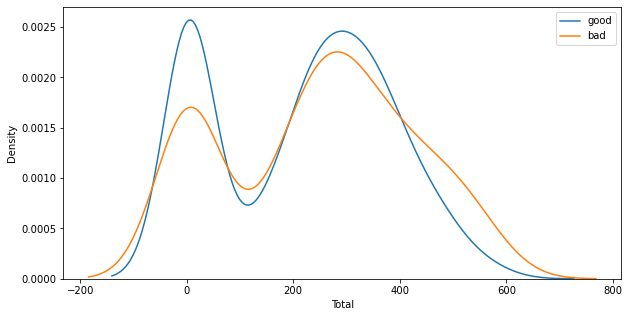

In [12]:
# 시각화
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(stats[stats['Alignment']== 'good']['Total'], ax=ax) # kdeplot: 밀도 플롯(seaborn사용)
sns.kdeplot(stats[stats['Alignment']== 'bad']['Total'], ax=ax) # ax: 커널밀도 그림을 어떤 축에 그릴거냐를 정함. 여기서는 ax축에 다 그려주겠다 선언.

plt.legend(['good', 'bad']) #범례
plt.show()

- 적절한 그래프: 커널밀도그림(kdeplot)


- 전처리: stats[stats['Alignment']== 'good']['Total'] / stats[stats['Alignment']== 'bad']['Total']

## Extra Mission
---
- 다음 질문에 답하시오.
    - 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.
    - 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.
    - 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라.
    - 이 과제는 핵심 임무 이후에 진행되어야 한다.

In [14]:
info = pd.read_csv("./marvel_characters_info.csv")

In [15]:
info

,ID,Name,Alignment,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,0,A-Bomb,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
1,1,Abe Sapien,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
2,2,Abin Sur,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
3,3,Abomination,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
4,4,Abraxas,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
730,730,Ymir,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
731,731,Yoda,good,Male,brown,Yoda's species,White,George Lucas,green,66.0,17.0
732,732,Zatanna,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


---
 - 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 또한 각 캐릭터는 DC, 마블 등 다양한 코믹스 회사를 바탕으로 하고 있다. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가? 이를 보이기 위한 과정을 보여라.


In [16]:
# 코믹스 회사들 알아보기

companies = info["Publisher"].unique() 
# unique() : 유일한 값(고유한 값)들이 어떠한 종류들이 있는지 알고 싶을 때 사용
# 여기서는 "publisher"열의 유일한 값들이 어떠한 종류들이 있는지, 즉 코믹스 회사들 종류를 (중복없이) 알고 싶어 사용하였다. 
companies

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [19]:
# stats, info 데이터 프레임 "Name"을 기준으로 합치기



avengers = pd.merge(stats,info,on = "Name", how = 'outer')
# merge(): 공통의 열을 기준으로 두 데이터프레임을 합쳐준다. 
# 기준열 이름이 같을때: merge(데이터프레임1, 데이터프레임2, on = "기준열", how = "조인방식")
# 기준열 이름이 다를때: merge(데이터프레임1, 데이터프레임2, 데이터프레임1_on ="데이터프레임1 기준열", 데이터프레임2_on = "데이터프레임2 기준열", how = "조인방식")

# 조인방식: left join(left), right join(right), inner join(inner), outer join(outer) . 기본값은 inner
# left join("left") : 왼쪽 데이터프레임(데이터프레임1)을 기준으로 조인. 오른쪽 데이터프레임(데이터프레임2)에 없는 값은 NaN으로 나타남
# right join("right") : 오른쪽 데이터프레임(데이터프레임2)를 기준으로 조인. 왼쪽 데이터프레임(데이터프레임1)에 없는 값은 NaN으로 나타남
# inner join("inner") : 교집합을 의미한다. 양쪽 데이터프레임에 공통으로 있는 값만 나타남
# outer join("outer") : 모든 값이 나타나도록 한다. 왼쪽 데이터프레임, 오른쪽 데이터프레임에 없는 값들은 NaN으로 나타남. 
avengers

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
0,3-D Man,good,50.0,31.0,43.0,32.0,25.0,52.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,1.0,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Vibe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,694.0,good,Male,brown,Human,Black,DC Comics,-,178.0,71.0
761,Violet Parr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698.0,good,Female,violet,Human,Black,Dark Horse Comics,-,137.0,41.0
762,Vixen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,701.0,good,Female,amber,Human,Black,DC Comics,-,175.0,63.0
763,White Canary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713.0,bad,Female,brown,Human,Black,DC Comics,-,-99.0,-99.0


In [21]:
avengers.isnull().sum() # 결측치 개수 확인

Name              0
Alignment_x     139
Intelligence    136
Strength        136
Speed           136
Durability      136
Power           136
Combat          136
Total           136
ID               29
Alignment_y      29
Gender           29
EyeColor         29
Race             29
HairColor        29
Publisher        44
SkinColor        29
Height           29
Weight           31
dtype: int64

In [22]:
# total 결측치 제거

avengers = avengers.dropna(axis=0) 
#dropna() : 1개라도 결측치가 있는 행은 제거 가능(기본 옵션 값이 how=any, 보통 any는 생략한다. )
# 모두 결측치가 있을시 행을 제거하려면 dropna(how="all")
avengers

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,1.0,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,4.0,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,Yellowjacket,good,88.0,10.0,12.0,28.0,12.0,14.0,164.0,728.0,good,Male,blue,Human,Blond,Marvel Comics,-,183.0,83.0
625,Yellowjacket II,good,50.0,10.0,35.0,28.0,31.0,28.0,182.0,729.0,good,Female,blue,Human,Strawberry Blond,Marvel Comics,-,165.0,52.0
626,Ymir,good,50.0,100.0,27.0,100.0,83.0,28.0,388.0,730.0,good,Male,white,Frost Giant,No Hair,Marvel Comics,white,304.8,-99.0
627,Zatanna,good,75.0,10.0,23.0,28.0,100.0,56.0,292.0,732.0,good,Female,blue,Human,Black,DC Comics,-,170.0,57.0


In [25]:
# 가장 유명한 marvel과 dc 캐릭터 데이터들 가져오기


marvel = avengers[avengers.Publisher == 'Marvel Comics']
marvel.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,4.0,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
9,Agent Bob,good,10.0,8.0,13.0,5.0,5.0,20.0,61.0,9.0,good,Male,brown,Human,Brown,Marvel Comics,-,178.0,81.0
10,Agent Zero,good,75.0,28.0,38.0,80.0,72.0,95.0,388.0,10.0,good,Male,-,-,-,Marvel Comics,-,191.0,104.0


In [26]:
dc =avengers[avengers.Publisher == 'DC Comics']
dc.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
7,Adam Strange,good,1.0,1.0,1.0,1.0,0.0,1.0,5.0,7.0,good,Male,blue,Human,Blond,DC Comics,-,185.0,88.0
12,Alan Scott,good,63.0,80.0,23.0,90.0,98.0,32.0,386.0,13.0,good,Male,blue,-,Blond,DC Comics,-,180.0,90.0
14,Alfred Pennyworth,good,63.0,10.0,17.0,10.0,7.0,55.0,162.0,16.0,good,Male,blue,Human,Black,DC Comics,-,178.0,72.0
16,Amazo,bad,75.0,100.0,100.0,100.0,100.0,100.0,575.0,19.0,bad,Male,red,Android,-,DC Comics,-,257.0,173.0


In [27]:
# 마블 캐릭터 능력치 평균 vs 디씨 캐릭터 능력치 평균
print("마블", marvel["Total"].mean())
print("디씨", dc["Total"].mean())

마블 243.35734870317003
디씨 254.88888888888889


-> 디씨 캐릭터들이 평균적으로 마블보다 더 쎄다

In [38]:
# 전체 회사 캐릭터 구하기 

list1 = []

for i in companies: # 코믹스 회사 수 만큼 반복문 진행
  new = avengers[avengers.Publisher == i] # 각 코믹스 회사의 어벤져스 데이터를 new에 담음
  mean = new['Total'].mean() # 능력치 총합의 평균을 mean 변수에 담음
  list1.append([i,mean]) #list1에 [회사이름, 회사 어벤져스 데이터의 능력치 총합 평균] 리스트를 반복해서 담음
list1 = pd.DataFrame(list1) # 반복문이 끝나면 list1에는 [회사이름, 해당 회사의 능력치 총합 평균] 리스트들이 담겨있다. 이를 데이터 프레임화한다. 
list1

,0,1
0,Marvel Comics,243.357349
1,Dark Horse Comics,196.875000
2,DC Comics,254.888889
3,NBC - Heroes,140.526316
4,Wildstorm,5.000000
5,Image Comics,70.615385
6,NaN,NaN
7,Icon Comics,148.000000
8,SyFy,188.800000
9,Hanna-Barbera,5.000000


In [40]:
list1 = list1.set_index(list1[0],drop=True) # 코믹스 회사들의 열을 인덱스로 옮기고 열에서 삭제한다.
#set_index(): 인덱스로 삼기 원하는 열의 이름을 넣어주면 된다. 
#열 2개 이상도 멀티 인덱스 지정이 가능하다. 이 경우 원하는 열들을 리스트([])에 순서대로 넣어 함수의 인자로 넣어준다.
# drop = True : 열을 인덱스로 옮기고 열에서 삭제
# drop = False: 열을 인덱스로 옮기고 열에서도 유지(True가 default)
list1

,0,1
0,,
Marvel Comics,Marvel Comics,243.357349
Dark Horse Comics,Dark Horse Comics,196.875000
DC Comics,DC Comics,254.888889
NBC - Heroes,NBC - Heroes,140.526316
Wildstorm,Wildstorm,5.000000
Image Comics,Image Comics,70.615385
NaN,NaN,NaN
Icon Comics,Icon Comics,148.000000
SyFy,SyFy,188.800000


In [47]:
print(list1[0])

0
Marvel Comics            Marvel Comics
Dark Horse Comics    Dark Horse Comics
DC Comics                    DC Comics
NBC - Heroes              NBC - Heroes
Wildstorm                    Wildstorm
Image Comics              Image Comics
NaN                                NaN
Icon Comics                Icon Comics
SyFy                              SyFy
Hanna-Barbera            Hanna-Barbera
George Lucas              George Lucas
Team Epic TV              Team Epic TV
South Park                  South Park
HarperCollins            HarperCollins
ABC Studios                ABC Studios
Universal Studios    Universal Studios
Star Trek                    Star Trek
IDW Publishing          IDW Publishing
Shueisha                      Shueisha
Sony Pictures            Sony Pictures
J. K. Rowling            J. K. Rowling
Titan Books                Titan Books
Rebellion                    Rebellion
Microsoft                    Microsoft
J. R. R. Tolkien      J. R. R. Tolkien
Name: 0, dtype: object


# 코믹스 회사들의 열이 인덱스로 옮겨갔다(0,1,2,3... 부분이 코믹스 회사들로 바뀌었다)

In [41]:
# 어떠한 회사의 캐릭터들의 능력치 합의 평균이 가장 큰지?

list1[list1[1] == list1[1].max()] # 능력치 합의 평균이 가장 큰 회사
# 여기서 list1[1]은 능력치 총합의 평균 값들이다

,0,1
0,,
Shueisha,Shueisha,481.5


In [46]:
print(list1[1])

0
Marvel Comics        243.357349
Dark Horse Comics    196.875000
DC Comics            254.888889
NBC - Heroes         140.526316
Wildstorm              5.000000
Image Comics          70.615385
NaN                         NaN
Icon Comics          148.000000
SyFy                 188.800000
Hanna-Barbera          5.000000
George Lucas                NaN
Team Epic TV           5.000000
South Park                  NaN
HarperCollins          5.000000
ABC Studios          166.000000
Universal Studios    237.000000
Star Trek                   NaN
IDW Publishing              NaN
Shueisha             481.500000
Sony Pictures        398.000000
J. K. Rowling               NaN
Titan Books                 NaN
Rebellion                   NaN
Microsoft            425.000000
J. R. R. Tolkien            NaN
Name: 1, dtype: float64


# => Shueisha 회사의 캐릭터들의 능력치 합의 평균이 가장 크다

---
- 좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 단, 불의를 못참는 중립 캐릭터들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다. 이러한 상황일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라.

In [32]:
# 좋은 캐릭터 Info

good_avengers = avengers[avengers.Alignment_x == 'good']
good_avengers.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,0.0,good,Male,yellow,Human,No Hair,Marvel Comics,-,203.0,441.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,1.0,good,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,191.0,65.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,2.0,good,Male,blue,Ungaran,No Hair,DC Comics,red,185.0,90.0
6,Adam Monroe,good,63.0,10.0,12.0,100.0,71.0,64.0,320.0,6.0,good,Male,blue,-,Blond,NBC - Heroes,-,-99.0,-99.0
7,Adam Strange,good,1.0,1.0,1.0,1.0,0.0,1.0,5.0,7.0,good,Male,blue,Human,Blond,DC Comics,-,185.0,88.0


In [33]:
# 나쁜 캐릭터 Info

bad_avengers = avengers[avengers.Alignment_x == 'bad']
bad_avengers.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,3.0,bad,Male,green,Human / Radiation,No Hair,Marvel Comics,-,203.0,441.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,4.0,bad,Male,blue,Cosmic Entity,Black,Marvel Comics,-,-99.0,-99.0
11,Air-Walker,bad,50.0,85.0,100.0,85.0,100.0,40.0,460.0,11.0,bad,Male,blue,-,White,Marvel Comics,-,188.0,108.0
16,Amazo,bad,75.0,100.0,100.0,100.0,100.0,100.0,575.0,19.0,bad,Male,red,Android,-,DC Comics,-,257.0,173.0
17,Ammo,bad,1.0,1.0,1.0,1.0,0.0,1.0,5.0,20.0,bad,Male,brown,Human,Black,Marvel Comics,-,188.0,101.0


In [34]:
# 중립 캐릭터들 info
neutral_avengers = avengers[avengers.Alignment_x == 'neutral']
neutral_avengers.head()

,Name,Alignment_x,Intelligence,Strength,Speed,Durability,Power,Combat,Total,ID,Alignment_y,Gender,EyeColor,Race,HairColor,Publisher,SkinColor,Height,Weight
86,Bizarro,neutral,75.0,95.0,100.0,100.0,95.0,85.0,550.0,92.0,neutral,Male,black,Bizarro,Black,DC Comics,white,191.0,155.0
193,Deadpool,neutral,50.0,15.0,30.0,100.0,100.0,100.0,395.0,212.0,neutral,Male,brown,Mutant,No Hair,Marvel Comics,-,188.0,95.0
196,Deathstroke,neutral,75.0,30.0,35.0,100.0,36.0,90.0,366.0,215.0,neutral,Male,blue,Human,White,DC Comics,-,193.0,101.0
246,Galactus,neutral,100.0,100.0,83.0,100.0,100.0,70.0,553.0,272.0,neutral,Male,black,Cosmic Entity,Black,Marvel Comics,-,876.0,16.0
328,Juggernaut,neutral,44.0,100.0,42.0,100.0,74.0,70.0,430.0,373.0,neutral,Male,blue,Human,Red,Marvel Comics,-,287.0,855.0


In [36]:
print(good_avengers.Total.mean())
print(bad_avengers.Total.mean())
print(neutral_avengers.Total.mean())

222.58949880668257
251.95625
355.3636363636364


# 좋은 캐릭터들의 평균 능력치가 나쁜 캐릭터들의 평균 능력치보다 낮기 때문에 중립 캐릭터들이 좋은 캐릭터들에 가담한다. 그리고 중립 캐릭터들의 평균능력치가 나쁜 캐릭터의 평균 능력치 보다 높으므로, 좋은 캐릭터들이 결국 승리한다. 
# Abengers!